In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O2','C2']
psi_dihedral=['C1','O2','C2','C3']

di_sugar=['MAN', 'BMA']
patterns1= ['MAN(*_*_)]-BMA(*_*_)', 'MAN(*_*_)-BMA(*_*_)','MAN(*_*_)]-[*]-BMA(*_*_)', 'MAN(*_*_)-[*]-BMA(*_*_)']
patterns2= ['DManpa1-2DManpb', 'DManpa1-2]DManpb', 'DManpa1-2[*]DManpb']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-2D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A0T', '1A0T', '1A0T', '1A0T', '1A0T', '1A0T', '1A14', '1AA5', '1AA5', '1AF6', '1AF6', '1AF6', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AFC', '1AGM', '1AGM', '1BHG', '1BHG', '1BJI', '1BRR', '1BRR', '1BXH', '1BXH', '1BZB', '1C0Q', '1C0Q', '1C0R', '1C0R', '1C3N', '1CAP', '1CB8', '1CF3', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1DBG', '1DBO', '1DOG', '1DOG', '1DP5', '1DPJ', '1DSR', '1DZE', '1E05', '1EX2', '1F4Y', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1FE0', '1FE4', '1FEE', '1FI1', '1FQ6', '1FVM', '1FVM', '1FVM', '1FVM', '1FVM', '1FVM', '1G0V', '1GAC', '1GAC', '1GAH', '1GAH', '1GAI', '1GAI', '1GAL', '1GLM', '1GLM', '1GNX', '1GPE', '1GPE', '1GSL', '1GW0', '1GW0', '1GYA', '1GZ9', '1H3X', '1H3Y', '1H4P', '1H4P', '1HFU', '1HH3', '1HH3', '1HH3', '1HH3', '1HHA', '1HHA', '1HHA', '1HHA', '1HHC', '1HHC', '1HHC', '1HHC', '1HHF', '1HHF', '1HHF', '1HHF', '1HM2', '1HM2', '1HM3', '1HM3', '1HMU', '1HMU

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 2 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 2 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 115 
valid torsion1 and torsion2: (115, 115)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['4.D', '3.D'], ['4C1', '4C1'])
(['7.D', '3.D'], ['4C1', '4C1'])
(['6.D', '3.D'], ['4C1', '4C1'])
(['7.C', '3.C'], ['4C1', '4C1'])
(['6.C', '3.C'], ['4C1', '4C1'])
(['4.C', '3.C'], ['4C1', '4C1'])
(['4.C', '3.C'], ['4C1', '4C1'])
(['9.C', '3.C'], ['-', '4C1'])
(['7.C', '3.C'], ['4C1', '4C1'])
(['2.P', '1.P'], ['4C1', '4C1'])
(['3.P', '1.P'], ['4C1', '4C1'])
(['2.K', '1.K'], ['4C1', '4C1'])
(['3.K', '1.K'], ['4C1', '4C1'])
(['2.T', '1.T'], ['4C1', '4C1'])
(['3.T', '1.T'], ['4C1', '4C1'])
(['4.B', '3.B'], ['4C1', '4C1'])
(['7.B', '3.B'], ['-', '4C1'])
(['6.B', '3.B'], ['-', '4C1'])
(['4.M', '3.M'], ['4C1', '4C1'])
(['7.M', '3.M'], ['4C1', '4C1'])
(['6.M', '3.M'], ['4C1', '4C1'])
(['5.E', '4.E'], ['4C1', '4C1'])
(['6.E', '3.E'], ['3S1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '-'])
(['4.N', '3.N'], ['4C1', '4C1'])
(['6.N', '3.N'], ['4C1', '4C1'])
(['7.E', '2.E'], ['4C1', '4C1'])
(['5.E', '4.E'], ['-', '-'])
(['3.E', '2.E'], ['BO3', '4C1'])
(['7.G', '2.G'], ['-',

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//7wh7.pdb D MAN 4 C1
../../pdbs//7wh7.pdb D BMA 3 O2
4967 4962
No connection found between 4967 and 4962
0
../../pdbs//7wh7.pdb D MAN 7 C1
../../pdbs//7wh7.pdb D BMA 3 O2
5000 4962
No connection found between 5000 and 4962
1
../../pdbs//7wh7.pdb D MAN 6 C1
../../pdbs//7wh7.pdb D BMA 3 O2
4989 4962
No connection found between 4989 and 4962
2
../../pdbs//6mdt.pdb C MAN 7 C1
../../pdbs//6mdt.pdb C BMA 3 O2
11562 11524
No connection found between 11562 and 11524
3
../../pdbs//6mdt.pdb C MAN 6 C1
../../pdbs//6mdt.pdb C BMA 3 O2
11551 11524
No connection found between 11551 and 11524
4
../../pdbs//6mdt.pdb C MAN 4 C1
../../pdbs//6mdt.pdb C BMA 3 O2
11529 11524
No connection found between 11529 and 11524
5
../../pdbs//1dpj.pdb C MAN 4 C1
../../pdbs//1dpj.pdb C BMA 3 O2
2799 2794
No connection found between 2799 and 2794
6
../../pdbs//1dpj.pdb C MAN 9 C1
../../pdbs//1dpj.pdb C BMA 3 O2
2854 2794
No connection found between 2854 and 2794
7
../../pdbs//1dpj.pdb C MAN 7 C1
../../pdbs//

In [13]:
output_df.to_csv('DManpa1-2DManpb_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DManpa1-2DManpb_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,7wh7.pdb,D MAN 4 C2 C1 BMA 3 O2 C2,D MAN 4 C1 BMA 3 O2 C2 C3,192.7870,47.5692,"([MAN(4_D_), BMA(3_D_)], [21.28, 17.37])",MAN(7_D_)-[MAN(6_D_)-[MAN(5_D_)]-MAN(4_D_)]-BM...,DManpa1-2[DManpa1-6]DManpa1-3[DManpa1-6]DManpb...,"([4.D, 3.D], [4C1, 4C1])"
1,7wh7.pdb,D MAN 7 C2 C1 BMA 3 O2 C2,D MAN 7 C1 BMA 3 O2 C2 C3,181.6970,297.9418,"([MAN(7_D_), BMA(3_D_)], [30.23, 17.37])",MAN(7_D_)-[MAN(6_D_)-[MAN(5_D_)]-MAN(4_D_)]-BM...,DManpa1-2[DManpa1-6]DManpa1-3[DManpa1-6]DManpb...,"([7.D, 3.D], [4C1, 4C1])"
2,7wh7.pdb,D MAN 6 C2 C1 BMA 3 O2 C2,D MAN 6 C1 BMA 3 O2 C2 C3,331.9519,107.8970,"([MAN(6_D_), BMA(3_D_)], [40.46, 17.37])",MAN(7_D_)-[MAN(6_D_)-[MAN(5_D_)]-MAN(4_D_)]-BM...,DManpa1-2[DManpa1-6]DManpa1-3[DManpa1-6]DManpb...,"([6.D, 3.D], [4C1, 4C1])"
3,6mdt.pdb,C MAN 7 C2 C1 BMA 3 O2 C2,C MAN 7 C1 BMA 3 O2 C2 C3,154.6880,37.3243,"([MAN(7_C_), BMA(3_C_)], [118.36, 118.36])",MAN(6_C_)-[MAN(5_C_)]-MAN(4_C_)-[MAN(7_C_)]-BM...,DManpa1-2[DManpa1-6]DManpa1-6[DManpa1-3]DManpb...,"([7.C, 3.C], [4C1, 4C1])"
4,6mdt.pdb,C MAN 6 C2 C1 BMA 3 O2 C2,C MAN 6 C1 BMA 3 O2 C2 C3,259.1780,317.1647,"([MAN(6_C_), BMA(3_C_)], [118.36, 118.36])",MAN(6_C_)-[MAN(5_C_)]-MAN(4_C_)-[MAN(7_C_)]-BM...,DManpa1-2[DManpa1-6]DManpa1-6[DManpa1-3]DManpb...,"([6.C, 3.C], [4C1, 4C1])"
...,...,...,...,...,...,...,...,...,...
110,4uoj.pdb,F MAN 10 C2 C1 BMA 3 O2 C,F MAN 10 C1 BMA 3 O2 C2 C,35.4519,270.5508,"([MAN(10_F_), BMA(3_F_)], [49.65, 49.01])",MAN(11_F_)-MAN(10_F_)-[MAN(9_F_)-MAN(8_F_)]-MA...,DManpa1-2DManpa1-2DManpb1-3[DManpa1-2DManpa1-3...,"([10.F, 3.F], [4C1, 4C1])"
111,4uoj.pdb,F MAN 7 C2 C1 BMA 3 O2 C2,F MAN 7 C1 BMA 3 O2 C2 C3,317.0900,285.3015,"([MAN(7_F_), BMA(3_F_)], [53.07, 49.01])",MAN(11_F_)-MAN(10_F_)-[MAN(9_F_)-MAN(8_F_)]-MA...,DManpa1-2DManpa1-2DManpb1-3[DManpa1-2DManpa1-3...,"([7.F, 3.F], [4C1, 4C1])"
112,4uoj.pdb,K MAN 5 C2 C1 BMA 4 O2 C2,K MAN 5 C1 BMA 4 O2 C2 C3,219.8890,91.0268,"([MAN(5_K_), BMA(4_K_)], [49.73, 47.86])",MAN(11_K_)-MAN(10_K_)-[MAN(9_K_)-MAN(8_K_)]-MA...,DManpa1-2DManpa1-2DManpb1-3[DManpa1-2DManpa1-3...,"([5.K, 4.K], [4C1, 4C1])"
113,4uoj.pdb,K MAN 10 C2 C1 BMA 3 O2 C,K MAN 10 C1 BMA 3 O2 C2 C,34.5343,268.7870,"([MAN(10_K_), BMA(3_K_)], [46.25, 47.32])",MAN(11_K_)-MAN(10_K_)-[MAN(9_K_)-MAN(8_K_)]-MA...,DManpa1-2DManpa1-2DManpb1-3[DManpa1-2DManpa1-3...,"([10.K, 3.K], [4C1, 4C1])"


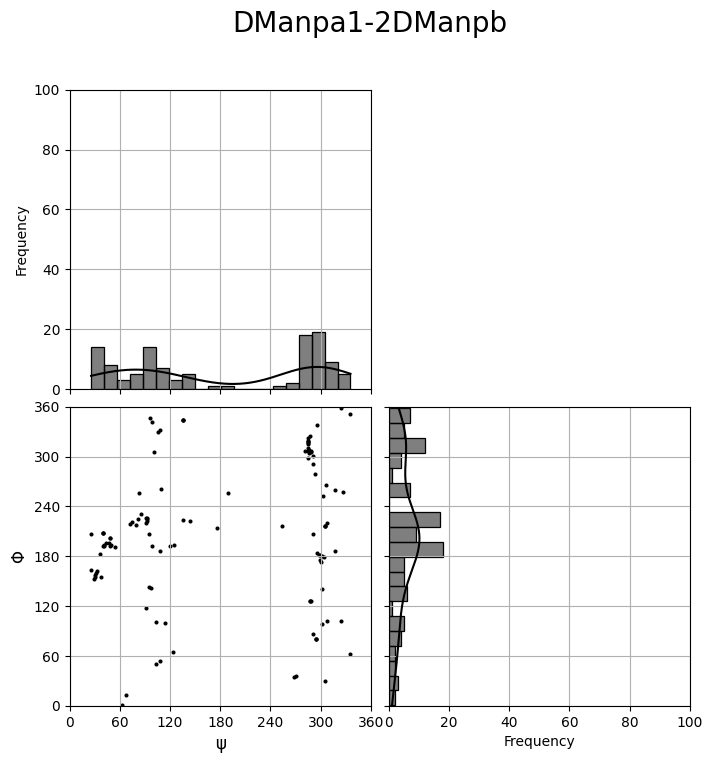

In [16]:
instant1.plot(torsions=instant1.torsions, title='DManpa1-2DManpb',max_histogram_scale=100,step_histogram_tick=20)